# Capstone Project- Student Performance Analysis
# Sonali Bhardwaj(12418148)


In [4]:
!pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
#importing the dataset
student_data= pd.read_csv('/Users/sateshkundu/Desktop/updated_student_data.csv')
student_data

,Age,Gender,Study hours per week after classes,Attendance,Prefered Study time,Learning using tech,Motivation Level,Involvement in extracurricular activities,Sleep_hours,Previous scores,Current scores
0,17,Male,23,84,NaN,High,Low,No,7,73,87
1,24,Female,19,64,NaN,Medium,Low,No,8,59,55
2,22,Male,24,98,NaN,Medium,Medium,Yes,7,91,95
3,19,Male,29,89,NaN,Medium,Medium,Yes,8,87,93
4,22,Female,19,92,NaN,Medium,Medium,Yes,6,65,70
...,...,...,...,...,...,...,...,...,...,...,...
495,17,Male,23,88,NaN,Medium,Medium,Yes,7,59,67
496,25,Male,14,89,NaN,High,Medium,Yes,4,73,70
497,22,Male,19,88,NaN,Medium,Medium,No,5,95,69
498,17,Female,15,72,NaN,High,Medium,No,8,50,65


In [6]:
# Assign random ages between 17 and 25 to the missing 'Age' values individually to avoid TypeError
random_ages = np.random.randint(17, 26, size=student_data['Age'].isna().sum())
student_data.loc[student_data['Age'].isna(), 'Age'] = random_ages

# Display the updated dataset to confirm the changes in the 'Age' column
student_data.head(10)


,Age,Gender,Study hours per week after classes,Attendance,Prefered Study time,Learning using tech,Motivation Level,Involvement in extracurricular activities,Sleep_hours,Previous scores,Current scores
0,17,Male,23,84,NaN,High,Low,No,7,73,87
1,24,Female,19,64,NaN,Medium,Low,No,8,59,55
2,22,Male,24,98,NaN,Medium,Medium,Yes,7,91,95
3,19,Male,29,89,NaN,Medium,Medium,Yes,8,87,93
4,22,Female,19,92,NaN,Medium,Medium,Yes,6,65,70
5,24,Male,19,88,NaN,Medium,Medium,Yes,8,89,71
6,21,Male,29,84,NaN,Low,Low,Yes,7,68,67
7,23,Male,25,78,NaN,High,Medium,Yes,6,67,88
8,25,Male,17,94,NaN,High,High,No,6,80,85
9,20,Male,23,98,NaN,Medium,Medium,Yes,8,71,87


In [7]:
student_data.to_csv('updated_student_data.csv', index=False)

In [8]:
# Step 2: Descriptive Statistics
print("Summary Statistics:\n", student_data.describe())

Summary Statistics:
               Age  Study hours per week after classes  Attendance  \
count  500.000000                          500.000000  500.000000   
mean    21.266000                           20.050000   79.254000   
std      2.586237                            5.886663   11.317847   
min     17.000000                            1.000000   60.000000   
25%     19.000000                           16.000000   69.750000   
50%     21.000000                           20.000000   78.500000   
75%     24.000000                           24.000000   88.000000   
max     25.000000                           43.000000  100.000000   

       Prefered Study time  Sleep_hours  Previous scores  Current scores  
count                  0.0   500.000000       500.000000      500.000000  
mean                   NaN     6.842000        75.954000       68.510000  
std                    NaN     1.388846        14.223801        6.200548  
min                    NaN     4.000000        50.000000 

In [9]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        500 non-null    int64  
 1   Gender                                     500 non-null    object 
 2   Study hours per week after classes         500 non-null    int64  
 3   Attendance                                 500 non-null    int64  
 4   Prefered Study time                        0 non-null      float64
 5   Learning using tech                        500 non-null    object 
 6   Motivation Level                           500 non-null    object 
 7   Involvement in extracurricular activities  500 non-null    object 
 8   Sleep_hours                                500 non-null    int64  
 9   Previous scores                            500 non-null    int64  
 10  Current scores            

In [10]:
# Check columns and adjust the column name
print("Columns in the dataset:", student_data.columns)

# Correcting the column name and dropping it
student_data = student_data.drop(columns=['Prefered Study time'])  
print("Column 'Preferred Study Time' dropped due to missing values.")

# Verify the result
print(student_data.head())


Columns in the dataset: Index(['Age', 'Gender', 'Study hours per week after classes', 'Attendance',
       'Prefered Study time', 'Learning using tech', 'Motivation Level',
       'Involvement in extracurricular activities', 'Sleep_hours',
       'Previous scores', 'Current scores'],
      dtype='object')
Column 'Preferred Study Time' dropped due to missing values.
   Age  Gender  Study hours per week after classes  Attendance  \
0   17    Male                                  23          84   
1   24  Female                                  19          64   
2   22    Male                                  24          98   
3   19    Male                                  29          89   
4   22  Female                                  19          92   

  Learning using tech Motivation Level  \
0                High              Low   
1              Medium              Low   
2              Medium           Medium   
3              Medium           Medium   
4              Medium    

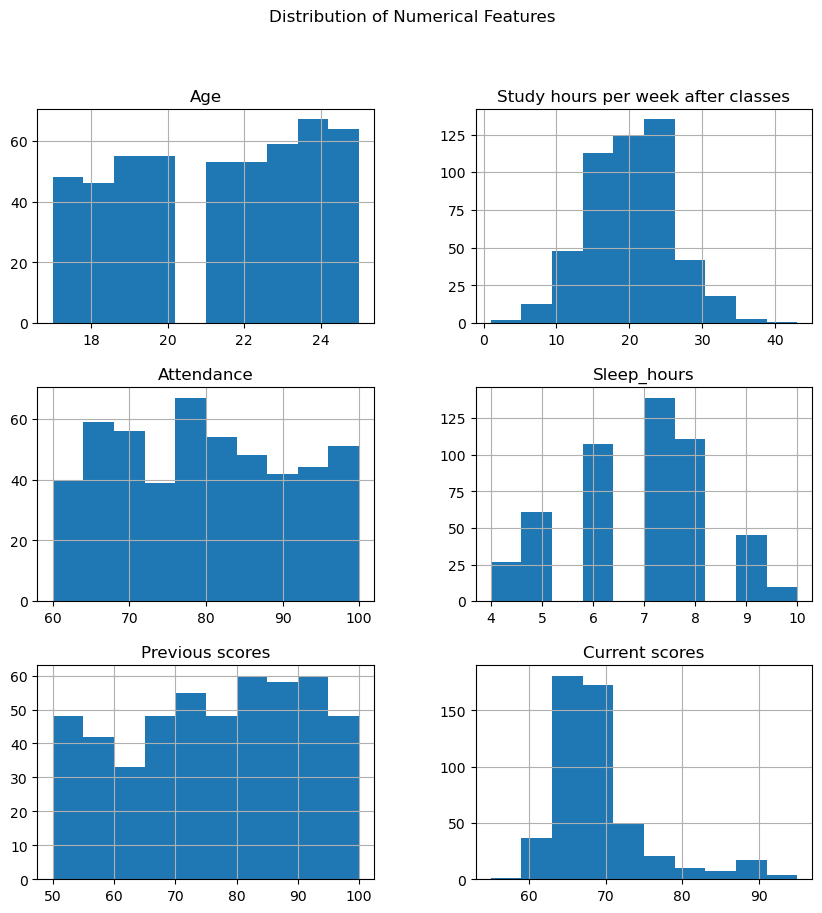

In [11]:
# Step 3: Distribution Analysis
student_data.hist(bins=10, figsize=(10, 10))
plt.suptitle("Distribution of Numerical Features")
plt.show()

In [12]:

gender_performance = student_data.groupby('Gender')['Current scores'].agg(['mean', 'median', 'std'])
print("\nGender-Based Performance Analysis:")
print(gender_performance)


Gender-Based Performance Analysis:
             mean  median       std
Gender                             
Female  68.038462    67.0  5.392647
Male    68.845890    67.0  6.705915


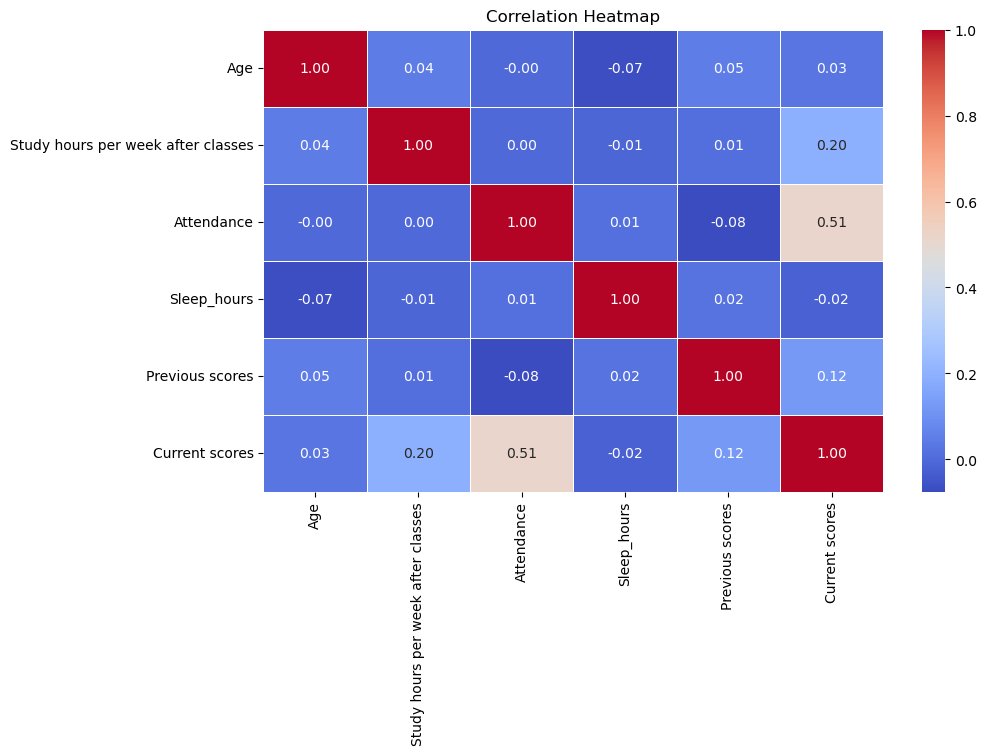

In [13]:
# Filter numerical columns
numerical_data = student_data.select_dtypes(include=['number'])

# Correlation matrix
correlation_matrix = numerical_data.corr()

# Heatmap of correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



# Comparison by Categories

/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/2991395802.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=student_data, x='Gender', y='Current scores', ci=None, palette='pastel')
/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/2991395802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=student_data, x='Gender', y='Current scores', ci=None, palette='pastel')


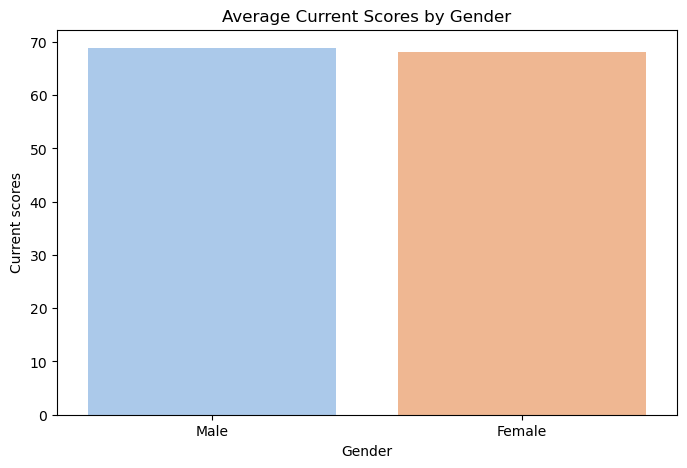

In [14]:
# Bar plot for average scores by gender
plt.figure(figsize=(8, 5))
sns.barplot(data=student_data, x='Gender', y='Current scores', ci=None, palette='pastel')
plt.title("Average Current Scores by Gender")
plt.show()


/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/344333196.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=student_data, x='Motivation Level', y='Current scores', ci=None, palette='muted')
/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/344333196.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=student_data, x='Motivation Level', y='Current scores', ci=None, palette='muted')


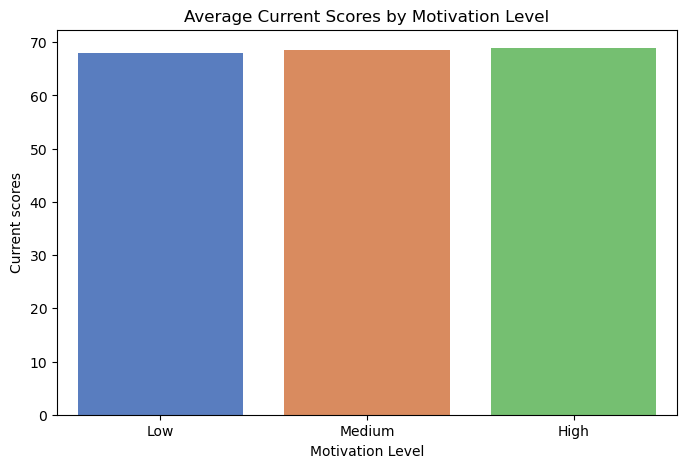

In [15]:
# Bar plot for average scores by motivation level
plt.figure(figsize=(8, 5))
sns.barplot(data=student_data, x='Motivation Level', y='Current scores', ci=None, palette='muted')
plt.title("Average Current Scores by Motivation Level")
plt.show()


#  Trend Analysis
# Comparing Previous Scores and Current Scores

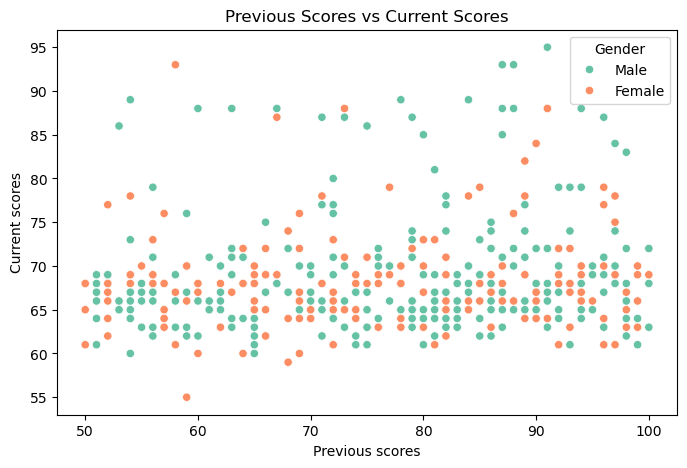

In [16]:
# Scatter plot for previous vs current scores
plt.figure(figsize=(8, 5))
sns.scatterplot(data=student_data, x='Previous scores', y='Current scores', hue='Gender', palette='Set2')
plt.title("Previous Scores vs Current Scores")
plt.show()


#  Impact of Attendance and Study Hours

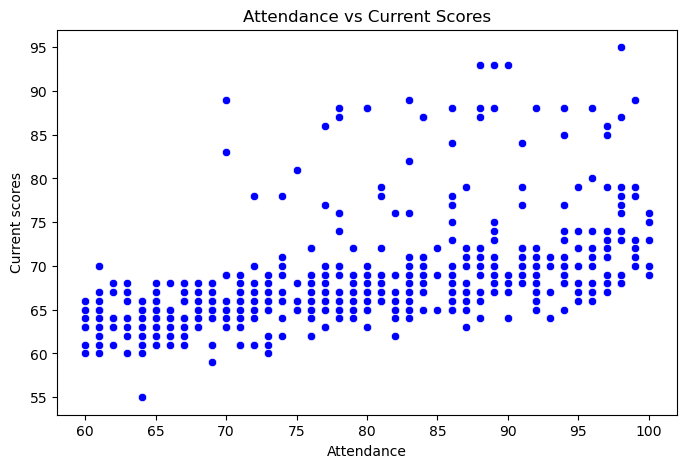

In [17]:
# Scatter plot for attendance vs current scores
plt.figure(figsize=(8, 5))
sns.scatterplot(data=student_data, x='Attendance', y='Current scores', color='blue')
plt.title("Attendance vs Current Scores")
plt.show()


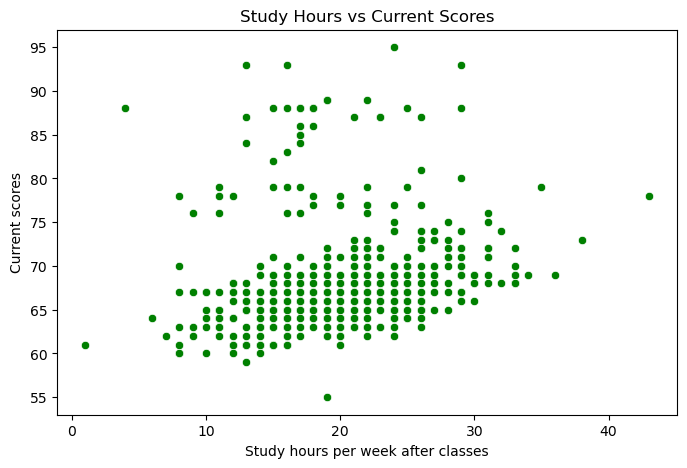

In [18]:
# Scatter plot for study hours vs current scores
plt.figure(figsize=(8, 5))
sns.scatterplot(data=student_data, x='Study hours per week after classes', y='Current scores', color='green')
plt.title("Study Hours vs Current Scores")
plt.show()


#  Sleep Analysis

/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/918049335.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=student_data, x='Sleep_hours', y='Current scores', palette='viridis')


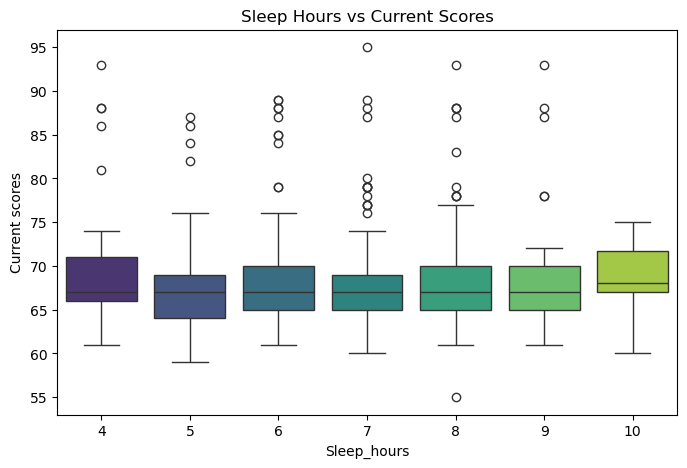

In [19]:
# Box plot for sleep hours and current scores
plt.figure(figsize=(8, 5))
sns.boxplot(data=student_data, x='Sleep_hours', y='Current scores', palette='viridis')
plt.title("Sleep Hours vs Current Scores")
plt.show()


# Technology Usage

/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/1104882215.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=student_data, x='Learning using tech', y='Current scores', ci=None, palette='coolwarm')
/var/folders/qc/pzggwf9s0xbchrxwy1y1_w480000gn/T/ipykernel_48280/1104882215.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=student_data, x='Learning using tech', y='Current scores', ci=None, palette='coolwarm')


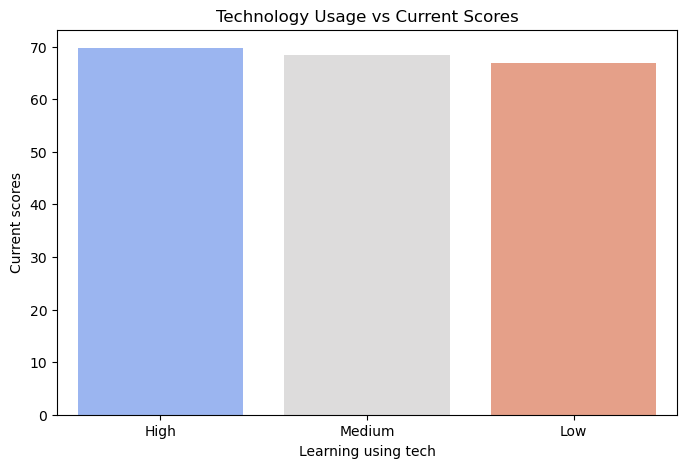

In [20]:
# Bar plot for current scores based on technology usage levels
plt.figure(figsize=(8, 5))
sns.barplot(data=student_data, x='Learning using tech', y='Current scores', ci=None, palette='coolwarm')
plt.title("Technology Usage vs Current Scores")
plt.show()


 # Case 1: Students Who Perform Well Under Specific Conditions
# Criteria:
# Learning using tech = High
# Motivation Level = High
# Current scores > 80

In [21]:
# Case 1: Filtering students who meet all three conditions
high_tech_high_motivation = student_data[
    (student_data['Learning using tech'] == 'High') &
    (student_data['Motivation Level'] == 'High') &
    (student_data['Current scores'] > 80)
]

print(f"Number of students meeting the criteria: {len(high_tech_high_motivation)}")
print(high_tech_high_motivation)


Number of students meeting the criteria: 6
    Age Gender  Study hours per week after classes  Attendance  \
8    25   Male                                  17          94   
62   21   Male                                  13          88   
63   18   Male                                  13          78   
67   22   Male                                  26          75   
74   21   Male                                   4          96   
88   25   Male                                  17          86   

   Learning using tech Motivation Level  \
8                 High             High   
62                High             High   
63                High             High   
67                High             High   
74                High             High   
88                High             High   

   Involvement in extracurricular activities  Sleep_hours  Previous scores  \
8                                         No            6               80   
62                                  

# Case 2: Students Struggling Despite High Study Hours
# Criteria:
# Study hours per week after classes > 20
# Current scores < 50
# Attendance < 75%

In [22]:
# Case 2: Filtering students who study a lot but struggle with performance
struggling_students = student_data[
    (student_data['Study hours per week after classes'] > 20) &
    (student_data['Current scores'] < 50) &
    (student_data['Attendance'] < 75)
]

print(f"Number of struggling students: {len(struggling_students)}")
print(struggling_students)


Number of struggling students: 0
Empty DataFrame
Columns: [Age, Gender, Study hours per week after classes, Attendance, Learning using tech, Motivation Level, Involvement in extracurricular activities, Sleep_hours, Previous scores, Current scores]
Index: []


# Case 3: Students Excelling with Low Sleep Hours
# Criteria:

# Sleep_hours < 6
# Current scores > 85

In [23]:
# Case 3: Filtering students who perform well with low sleep hours
low_sleep_high_scores = student_data[
    (student_data['Sleep_hours'] < 6) &
    (student_data['Current scores'] > 85)
]

print(f"Number of students excelling with low sleep hours: {len(low_sleep_high_scores)}")
print(low_sleep_high_scores)


Number of students excelling with low sleep hours: 6
     Age  Gender  Study hours per week after classes  Attendance  \
28    23  Female                                  16          90   
55    23    Male                                  26          88   
73    24  Female                                  29          92   
93    23    Male                                  18          97   
94    24  Female                                  18          89   
404   17    Male                                  17          77   

    Learning using tech Motivation Level  \
28               Medium           Medium   
55                 High           Medium   
73               Medium           Medium   
93               Medium              Low   
94               Medium           Medium   
404                High           Medium   

    Involvement in extracurricular activities  Sleep_hours  Previous scores  \
28                                         No            4               58   
55 

# Case 4: Students with High Attendance but Low Motivation
# Criteria:
# Attendance > 90%
# Motivation Level = Low

In [24]:
# Case 4: Filtering students with high attendance but low motivation
high_attendance_low_motivation = student_data[
    (student_data['Attendance'] > 90) &
    (student_data['Motivation Level'] == 'Low')
]

print(f"Number of students with high attendance but low motivation: {len(high_attendance_low_motivation)}")
print(high_attendance_low_motivation)


Number of students with high attendance but low motivation: 32
     Age  Gender  Study hours per week after classes  Attendance  \
11    21    Male                                  17          97   
37    18  Female                                   8          99   
44    20    Male                                  11          98   
68    18  Female                                  22          98   
89    25  Female                                  23          98   
92    17    Male                                  16          97   
93    23    Male                                  18          97   
105   25    Male                                  22          99   
113   25  Female                                  35          99   
129   22  Female                                  17          94   
152   24    Male                                  16          92   
173   25    Male                                  22          95   
176   24    Male                                  20 

# Case 5: Students Involved in Extracurriculars and High Scores
# Criteria:
# Involvement in extracurricular activities = Yes
# Current scores > 80

In [25]:
# Case 5: Filtering students involved in extracurriculars and performing well
extracurricular_high_scores = student_data[
    (student_data['Involvement in extracurricular activities'] == 'Yes') &
    (student_data['Current scores'] > 80)
]

print(f"Number of students excelling in extracurricular activities: {len(extracurricular_high_scores)}")
print(extracurricular_high_scores)


Number of students excelling in extracurricular activities: 20
     Age  Gender  Study hours per week after classes  Attendance  \
2     22    Male                                  24          98   
3     19    Male                                  29          89   
7     23    Male                                  25          78   
9     20    Male                                  23          98   
11    21    Male                                  17          97   
18    24  Female                                  15          80   
27    22    Male                                  22          83   
41    23  Female                                  21          84   
45    21    Male                                  16          70   
52    24    Male                                  16          86   
55    23    Male                                  26          88   
57    19    Male                                  18          94   
62    21    Male                                  13 

# Case 6: Students Meeting Multiple Moderate Criteria
# Criteria:
# Study hours per week after classes between 10 and 20 (inclusive)
# Sleep_hours between 6 and 8 (inclusive)
# Motivation Level = Medium

In [26]:
# Case 6: Filtering students meeting multiple moderate criteria
moderate_criteria_students = student_data[
    (student_data['Study hours per week after classes'].between(10, 20)) &
    (student_data['Sleep_hours'].between(6, 8)) &
    (student_data['Motivation Level'] == 'Medium')
]

print(f"Number of students meeting moderate criteria: {len(moderate_criteria_students)}")
print(moderate_criteria_students)


Number of students meeting moderate criteria: 106
     Age  Gender  Study hours per week after classes  Attendance  \
4     22  Female                                  19          92   
5     24    Male                                  19          88   
10    17    Male                                  17          80   
14    18    Male                                  10          78   
15    22  Female                                  17          68   
..   ...     ...                                 ...         ...   
485   18  Female                                  11          65   
486   19  Female                                  16          64   
492   24  Female                                  20          61   
493   20    Male                                  15          73   
498   17  Female                                  15          72   

    Learning using tech Motivation Level  \
4                Medium           Medium   
5                Medium           Medium   
1

# Paired t test 
# Scenario for Paired 
# t-Test
# Objective: Test whether there is a significant improvement in students' Current scores compared to their Previous scores.
# Hypotheses:
# Null Hypothesis (H0): There is no significant difference between previous and current scores.
# Alternative Hypothesis (Ha): There is a significant difference between previous and current scores.


In [27]:
from scipy.stats import ttest_rel

# Check for missing values and drop rows with NaNs
student_data_cleaned = student_data[['Previous scores', 'Current scores']].dropna()

# Extract the two related groups
previous_scores = student_data_cleaned['Previous scores']
current_scores = student_data_cleaned['Current scores']

# Perform the paired t-test
t_stat, p_value = ttest_rel(previous_scores, current_scores)

# Display the results
print(f"Paired t-test Results:")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between previous and current scores.")
else:
    print("Fail to reject the null hypothesis: No significant difference between previous and current scores.")


Paired t-test Results:
T-statistic: 11.253384500253215
P-value: 2.4521819448855758e-26
Reject the null hypothesis: There is a significant difference between previous and current scores.


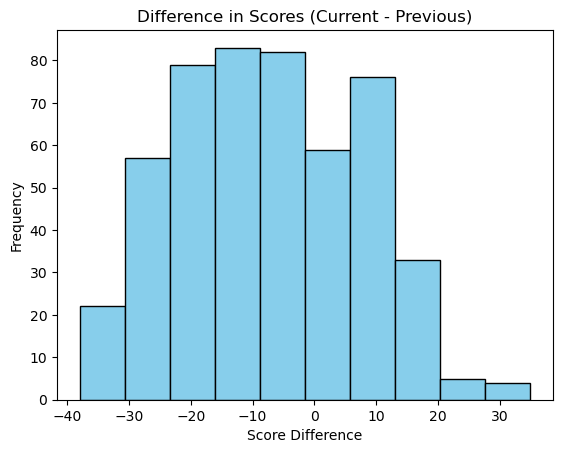

In [28]:
#Visualization: Plot the differences between the scores.
import matplotlib.pyplot as plt

score_diff = current_scores - previous_scores
plt.hist(score_diff, bins=10, color='skyblue', edgecolor='black')
plt.title("Difference in Scores (Current - Previous)")
plt.xlabel("Score Difference")
plt.ylabel("Frequency")
plt.show()
